**CS-GY 6613, Artificial Intelligence, Spring 2020**<br/>
**New York University Tandon School of Engineering**<br/>
**Course Project - 1**<br/>
**Name - Durga Prasad Reddy Kasireddy**<br/> 
**Net ID - dpk290**<br/>
**Name - Haneen Alsuradi**<br/> 
**Net ID - hha243**<br/>
**Name - Teena Kunsoth**<br/> 
**Net ID - tk2598**<br/>

# Introduction:
## Conventional AI: <br \>
- We often employ Empirical Risk Minimization whenever we try to model a supervised learning problem. We have a labelled data (X ,Y) where X is a feature vector and Y is a target vector. We try to model a hypothesis function H : X -> Y which maps the feature vector to the respective target vector label by optimizing a loss function (Least squared error OR Cross Entropy) using some algorithm to minimize the loss (SGD, RMSprop, Adam).

- [](http://)As research in the field of Artificial Intelligence progresses, we look to build more intelligent and robust systems. We look to replicate the type of thinking a human brain does. For example, a human brain memorizes a few pieces of data in an ordered sequence. The sequence may consist of examples from different tasks (say how to drive a car, how to cook, how to eat etc). Human brain is complex enough to solve examples from these tasks in any order possible and it doesn’t affect the accuracy of previous tasks (Unless you haven’t solved that task in a very long time like a year which is not the case we are talking about). 


## Why do we need to Upgrade our methodologies?
- Since the sequence of samples may consist of examples from different tasks, the assumption of “Independent and Identically distributed” of the ERM doesn’t work. Even if we try to implement ERM over samples from various tasks, we see what is called “Catastrophic Forgetting” i.e. the learning function forgets how to solve past tasks when it is exposed to new tasks. To bridge the gap between the current ERM and human thinking, Facebook Artificial Intelligence Research group has come up with an algorithm called Gradient Episodic Memory. 

## Continual AI: <br />
In conventional deep learning, we train a network to do a task (for example object recognition) with a predefined set of classes. Also, once the network is trained, weights are fixed. In continual learning, the idea is to keep updating the weights and learn from new instances faced by the network. This might again lead to Catastrophic Forgetting which means new instances are causing old knowledge to be wiped. In other words, new instances are causing the weights of the network to be modified and thus affecting the performance of the previously trained task. Thus there are 3 suggested methods that can be used to overcome the (catastrophic forgetting): <br />

1. **Regularization:** Meaning there is a penalty on changing the weights of the Neural Network. The penalty increases proportionally with the (weight change) of the Neural Network. This helps in retaining the old knowledge. 

2. **Dynamic Architecture:** During learning a new task, new resources are allocated to learn new information (meaning, new neurons are created without changing the old weights of the network). This helps in learning new tasks without interfering with the previously gained knowledge.

3. **Complimentary Learning System (CLS):** A mixture of the two methods above. New resources are created (neurons/layers) and "some" old weights are changed

Gradient Episodic Memory comes under CLS and we will use it in this project.

## Dataset : <br />
The model observes the data in a continuum i.e. example by example which consists of <em>(x, t, y)<sub>i</sub></em>. Where ti is a task descriptor identifying which task the x<sub><em>i</em></sub>, y<sub><em>i</em></sub> belong to. We can still say that for one particular task, the examples belonging to that task are Independent and Identically Distributed also called locally i.i.d. The goal is to predict the target vector y for a test pair (x, t) where (x, y) ~ P<sub><em>t</em></sub> <br />

Human brain also functions in a similar way. Whenever a task driving comes, we think about the rules of how to drive and then start driving. Here, the task descriptor t<sub><em>i</em></sub> can be the rules of how to drive and similarly for the task of cooking, the task descriptor can be the recipe. Sometimes, the same input vector x<sub><em>i</em></sub> can be seen in two different tasks, for example the same ingredients can be used to prepare two different dishes which are two different tasks.
In this project, our task descriptors are integers.

GEM can be viewed as a model that learns the subset of correlations common to a set of distributions (tasks). GEM can also be used to predict target vectors associated to previous or new tasks without making use of task descriptors. <br />

The challenges solved by GEM model are :
1. **Non-iid input data:** the continuum of data is not iid with respect to any fixed probability distribution P(X, T, Y ) since, once tasks switch, a whole sequence of examples from the new task may be observed. 
2. **Catastrophic forgetting:** learning new tasks may hurt the performance of the learner at previously solved tasks. 
3. **Transfer learning:** when the tasks in the continuum are related, there exists an opportunity for transfer learning. This would translate into faster learning of new tasks, as well as performance improvements in old tasks

We use MNIST handwritten digit dataset. It consists of 60,000 images for training and 10,000 images for testing. Each image is 28*28 pixels. We rotate these digits by a certain angle and then try to predict the number. In this project we use 10 tasks (10 different rotation angles from 0 to 90 degrees). Which means each of the 10 tasks has 60,000 images for training and 10,000 images for testing. 

# Metrics : <br />
We calculate Average Accuracy on the test data, Backward transfer, Forward transfer. <br />
- Notation : <br />
R ∈ R<sup>T × T</sup> where R<sub>i,j</sub> is the test classification accuracy on task j after observing the last sample of task i. <br />

## Average Accuracy :
As the name suggests, we calculate the average accuracy of each task i, after looking at the last sample of every other task j <br />$\frac{1}{T}$$\sum_{i=1}^{T} R_{T,i}$

## Backward transfer:
As the name suggests, we focus on the average accuracy of each task i after each of the next tasks are completed.
BWT = $\frac{1}{T - 1}$$\sum_{i=1}^{T - 1} R_{T,i} - R_{i,i}$ <br />
There won't be any backward transfer for first task <br />

How to calculate :-
1. Record accuracy of each task i initially.
2. Learn task i + 1 and then record accuracy of task i
3. Since we want to know the transfer, subtract each by R<sub>i, i</sub> <br />

## Forward transfer:
As the name suggests, we focus on the average accuracy of each task i before each of the previous tasks are completed. <br />

FWT = $\frac{1}{T - 1}$$\sum_{i=2}^{T} R_{i-1,i} - b_{i}$ <br />
There won't be any forward transfer for the last task <br />

How to calculate :-
1. Record accuracy for each task i = b<sub>i</sub> upon initialization (Random initialization)
2. Learn task 1, record accuracy for task i, repeat this until task i - 1. For all tasks
3. Subtract their respective b<sub>i</sub> from the values and divide  by T - 1 to get average accuracy


For a fine grained evaluation, we can build a matrix R where R<sub>i,j</sub> is the test classification accuracy on task j after observing the i<sup>th</sup> sample in the continuum. Our dataset is huge and we have limited computational resources, so we go ahead with the earlier definition of R.

- Memory - We allocate a limited memory for each task and we store some samples from respective tasks in those memory slots. 

- Episodic - We will use these memory slots to calculate accuracy to make sure we are not significantly reducing the accuracy of previous tasks by learning new tasks

The GEM algorithm is capable of minimizing the negative backward transfer and increasing the forward transfer. To increase the forward transfer, we can utilize the task descriptor which may say rules about how to solve a particular task and use that knowledge also to solve next tasks if they are similar. But in our project, the task descriptors are integers and hence we cannot expect a significant positive forward transfer. Therefore, we focus on minimizing the negative backward transfer (Catastrophic forgetting). 

The memory unit for each task t<sub>i</sub> consists of the last m samples seen in that particular task t<sub>i</sub> where $\ m = \frac{M}{T}$ <br \>
M is total allowed memory and T is the number of tasks.

$\ l(f_{\theta}, M_{k})$ = $\frac{1}{T - 1}$$\sum_{(x_{i},k, y_{i}) \in M_{k}} l(f_{\theta}(x_{i}, k), y_{i})$

We cannot just minimize this loss function because it will result in overfitting to the examples in M<sub>k</sub>. So our goal is to minimize the loss function and make sure loss function after the end of each task t has NOT increased compared to loss function at the end of task t - 1 <br />

$\ <g, g_{k}>$ := $\ <\frac{\partial l(f_{\theta}(x, t), y)}{\partial \theta}, \frac{\partial l(f_{\theta}, M_{k})}{\partial \theta}>$   $\ge 0 $ for all k < t <br />

In order for a gradient update to take place, they compute the dot product of the current learning task with all the previous tasks in memory. The update is allowed to take place if the gradient is greater than or equal to 0 for all the episodes. This translates into constraining your update for one task to not conflict with an update for the previous task.

If the gradient is going the wrong way, we take this gradient update and project it to the closest possible vector that doesn’t go the wrong way

Firstly as long as we guarantee that the loss never increases, there is no need to store the predictor function at the end of each task. Secondly, (here is where the Memory we stored helps us!) we can diagnose the increases in loss of previous tasks by computing the angle between their loss gradient vector and proposed update. 

If these two constraints are satisfied, then the proposed update of the parameter g won’t increase loss in previous tasks. 

Else, there is at least one previous task that would experience an increase in loss after the parameter update. If violations occur, project the proposed gradient g to the closest gradient g˜ (in squared l<sub>2</sub> norm) satisfying all the constraints. Which means we need to <br />
$\ minimize_{g`} \frac{1}{2} \lvert\lvert g - g`\rvert\rvert^{2}_{2}$ <br />
subject to $\ <g`, g_{k}> \ge 0$ for all k < t


We can therefore write Dual of the GEM of a Quadratic Program <br />
$\ minimize_{v} \frac{1}{2}v^{T}GG^{T}v$ + $\ g^{T}G^{T}v$ <br />
subject to $\ v \ge 0$


This is a QP on t - 1 variables. Once we solve 11 for v* we can recover the projected update as <br />
$\ g` = G^{T}v^{*} + g$


# Algorithm
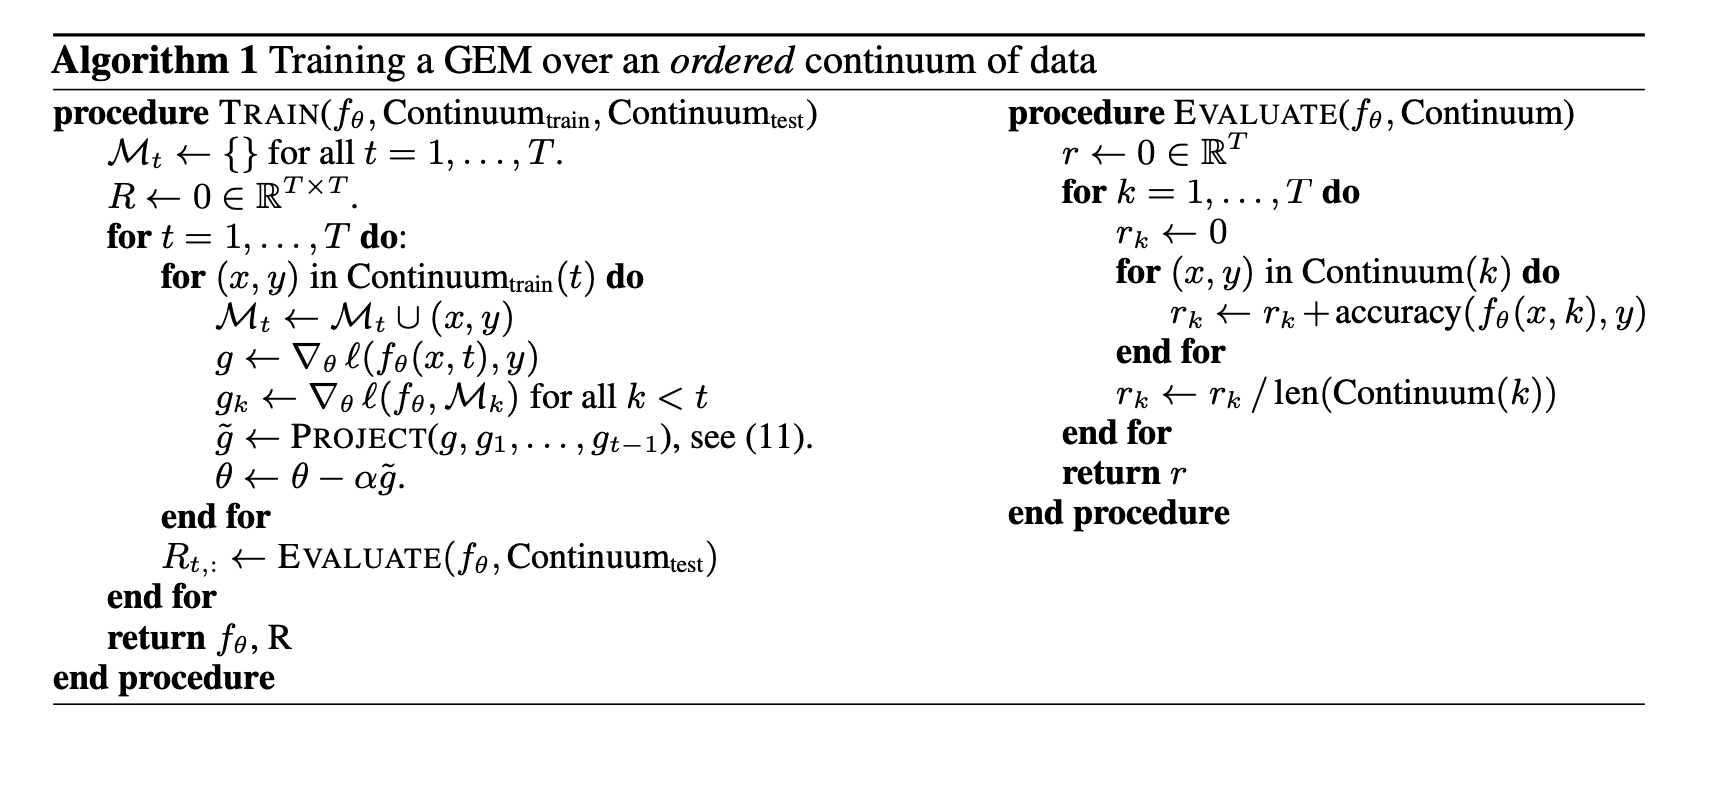

## Algorithm Explained:
### TRAIN function:
- Initialize memory for each task t.
- Initialize R matrix which is test accuracy after learning tasks.
- for each task t = 1,....T, and for each continuum data (x, y) in that task t, keep the last m = M / T samples
- g is the gradient of the loss function based on the current sample
- $\ g_k$ is the gradient of the loss function on the memory unit $\ M_k$. g is a list of the gradients.
- g~ (I used g` notation in previous explanation) 
is the projection of the gradient on current sample g with the gradient vector on all memory units (as explained earlier)
- In the code, we store the gradients of the past tasks using store_grad() method. project2cone2() method solves the Dual of GEM QP and returns the projected gradient and we use overwrite_grad() method to update current gradient with this projected gradient.
- $\ \theta$ is updated as per Stochastic Descent Algorithm using a hyperparameter $\ \alpha$ and gradient g~
- Update the matrix R using Evaluate function on test data.

### Evaluate function:
- Initialize r vector to zero
- for each task t, and for each continuum data (x, y) in that task, add accuracy on current test data sample.
- After all the samples in current task are added, divide by the size of the samples in that task.
- Return the predictor function $\ f_{\theta}$, matrix R
- Calculate BWT, FWT using the above formulae and plot graphs. We use eval_tasks() method to implement this function.


## Time Complexity of the Algorithm:
- Say our training data size is $\ D_{train}$ and test data size is $\ D_{test}$
- In TRAIN method, we have a for loop over all the tasks. All the updates in the second for loop are dominated by the Project function and the time complexity of Project function is O(t) where t is the number of tasks completed. So, time complexity is $\sum_{t=1}^{T} t * \ D_{train}$ because each task has $\ D_{train}$ samples in our problem. Therefore, for training, the time is O($\ T^2 * \ D_{train}$)
- For Evaluate method, it is called T times and each time the algorithm goes over each sample in each task. Each task has $\ D_{test}$ samples. So, overall time is O($\ T^2 * \ D_{test}$)
- Hence, the time complexity of the Algorithm is O($\ T^2 * \ D_{train}$ + $\ T^2 * \ D_{test}$). We can also write it as O($\ T^2 * \ D_{train}$) because $\ D_{test}$ is smaller than $\ D_{train}$.

## Architecture :
- Fully connected neural networks with two hidden layers of 100 ReLU units. 
- Mini batch size = 10
- Algorithm to optimize - Stochastic Gradient Descent 

## Code:
### Importing and Installing needed libraries

In [1]:
!pip install quadprog

  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=324060 sha256=67b12142d2a3808ee548e381604faf50beabcceda2ca56a891ad074cd3b1f163
  Stored in directory: /root/.cache/pip/wheels/93/0e/ce/a687c16e1d8d0babc9e8b1b1af30d6d5662d7585c07b360500
Successfully built quadprog


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import pickle
import torch
import os
from torchvision import transforms
from PIL import Image
import argparse
import os.path
import random
import torch

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mnist-numpy/mnist.npz


### Extracting mnist dataset (train and test):

In [3]:
# mnist_path = "mnist.npz"

# if not os.path.exists(mnist_path):
#     subprocess.call("wget https://s3.amazonaws.com/img-datasets/mnist.npz", shell=True)
    
f = np.load('../input/mnist-numpy/mnist.npz')
x_tr = torch.from_numpy(f['x_train'])
y_tr = torch.from_numpy(f['y_train']).long()
x_te = torch.from_numpy(f['x_test'])
y_te = torch.from_numpy(f['y_test']).long()
f.close()
torch.save((x_tr, y_tr), 'mnist_train.pt')
torch.save((x_te, y_te), 'mnist_test.pt')
x_tr.size()[0]
print('Xtrain size: [%d , %d , %d ]' % (x_tr.size()[0], x_tr.size()[1],x_tr.size()[2]))
print('Training Data contains 60000 images of dimensions 28x28')
print('Xtest size: [%d , %d , %d ]' % (x_te.size()[0], x_te.size()[1],x_te.size()[2]))
print('Test Data contains 10000 images of dimensions 28x28')
print('Ytrain size: [%d ]' % (y_tr.size()[0]))
print('60000 labels corresponding to 60000 training examples')
print('Ytest size: [%d ]' % (y_te.size()[0]))
print('10000 labels corresponding to 10000 test examples')


Xtrain size: [60000 , 28 , 28 ]
Training Data contains 60000 images of dimensions 28x28
Xtest size: [10000 , 28 , 28 ]
Test Data contains 10000 images of dimensions 28x28
Ytrain size: [60000 ]
60000 labels corresponding to 60000 training examples
Ytest size: [10000 ]
10000 labels corresponding to 10000 test examples


### Define function for rotating the dataset images:

In [4]:
#function rotates dataset d by the specified angle - rotation
def rotate_dataset(d, rotation):
    result = torch.FloatTensor(d.size(0), 784)
    tensor = transforms.ToTensor()

    for i in range(d.size(0)):
        img = Image.fromarray(d[i].numpy(), mode='L')
        result[i] = tensor(img.rotate(rotation)).view(784)
    return result

### Creating training and testing datasets (tasks, rotated set, labels):

In [5]:
a_ntasks = 10                                 #number of tasks = 10
a_min_rot = 0                                 #minimum rotation angle = 0
a_max_rot = 90                                #maximum rotation angle = 90
a_seed = 0                                    #setting randomness

torch.manual_seed(a_seed)

tasks_tr = []
tasks_te = []

for t in range(a_ntasks):
    min_rot = 1.0 * t / a_ntasks * (a_max_rot - a_min_rot) + \
        a_min_rot                               #minimum angle by which to rotate the images in dataset t
    max_rot = 1.0 * (t + 1) / a_ntasks * \
        (a_max_rot - a_min_rot) + a_min_rot      #maximum angle by which to rotate the images in dataset t
    rot = random.random() * (max_rot - min_rot) + min_rot      #set the rotation angle to a random value between max and min rotation angle of task t 

    tasks_tr.append([rot, rotate_dataset(x_tr, rot), y_tr])           #rotate each image in test and train dataset by the angle
    tasks_te.append([rot, rotate_dataset(x_te, rot), y_te])
    print('Rotated dataset by '+str(rot)+' degrees in task '+str(t)+'\n')

Rotated dataset by 3.6365703771791877 degrees in task 0

Rotated dataset by 13.418306859633827 degrees in task 1

Rotated dataset by 21.386102106475494 degrees in task 2

Rotated dataset by 32.33207729867484 degrees in task 3

Rotated dataset by 39.32126456787441 degrees in task 4

Rotated dataset by 49.17034634479002 degrees in task 5

Rotated dataset by 59.3416642445713 degrees in task 6

Rotated dataset by 69.24412821643548 degrees in task 7

Rotated dataset by 75.37259373448707 degrees in task 8

Rotated dataset by 89.9014807467582 degrees in task 9



### Plotting a sample from the training dataset. The original digit with its 10 rotations:

Rotation angles are:
3.6365703771791877
13.418306859633827
21.386102106475494
32.33207729867484
39.32126456787441
49.17034634479002
59.3416642445713
69.24412821643548
75.37259373448707
89.9014807467582


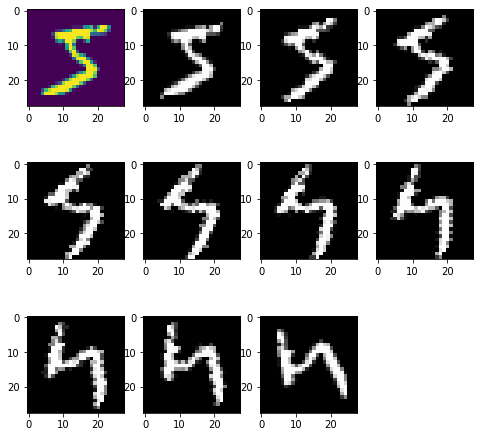

In [6]:
import numpy as np
import matplotlib.pyplot as plt

w=28
h=28
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(x_tr[0])
for i in range(10):
    x=tasks_tr[i][1][0]
    img = x.reshape((h, w))
    fig.add_subplot(rows, columns, i+2)
    plt.imshow(img, cmap=plt.cm.gray)

print('Rotation angles are:')
for i in range(10):
    print(tasks_tr[i][0])

### Create the models that will be used for training:

In [7]:
import math
import torch
import torch.nn as nn
from torch.nn.functional import relu, avg_pool2d

In [8]:

def Xavier(m):
    if m.__class__.__name__ == 'Linear':
        fan_in, fan_out = m.weight.data.size(1), m.weight.data.size(0)
        std = 1.0 * math.sqrt(2.0 / (fan_in + fan_out))
        a = math.sqrt(3.0) * std
        m.weight.data.uniform_(-a, a)
        m.bias.data.fill_(0.0)

In [9]:
class MLP(nn.Module):
    def __init__(self, sizes):                               #sizes = [784, 100, 100, 10]
        super(MLP, self).__init__()                          #Building a network with the above incoming and outgoing feature sizes of each layer
        layers = []

        for i in range(0, len(sizes) - 1):                   #4 layers in the neural network
            layers.append(nn.Linear(sizes[i], sizes[i + 1]))
            print('Layer '+str(i)+' > incoming feature size: '+str(sizes[i])+', outgoing feature size: '+str(sizes[i+1]))
            if i < (len(sizes) - 2):
                layers.append(nn.ReLU())
                print('Applying ReLU function')
                
        self.net = nn.Sequential(*layers)
        self.net.apply(Xavier)

    def forward(self, x):
        return self.net(x)

### Define the metrics that will be used for evaluation:

In [10]:
from __future__ import print_function

import torch

In [11]:
def task_changes(result_t):
    n_tasks = int(result_t.max() + 1)
    changes = []
    current = result_t[0]
    for i, t in enumerate(result_t):
        if t != current:
            changes.append(i)
            current = t

    return n_tasks, changes


def confusion_matrix(result_t, result_a, fname=None):
    nt, changes = task_changes(result_t)

    baseline = result_a[0]
    changes = torch.LongTensor(changes + [result_a.size(0)]) - 1
    result = result_a[changes]

    # acc[t] equals result[t,t]
    acc = result.diag()
    fin = result[nt - 1]
    # bwt[t] equals result[T,t] - acc[t]
    bwt = result[nt - 1] - acc

    # fwt[t] equals result[t-1,t] - baseline[t]
    fwt = torch.zeros(nt)
    for t in range(1, nt):
        fwt[t] = result[t - 1, t] - baseline[t]

    if fname is not None:
        f = open(fname, 'w')

        print(' '.join(['%.4f' % r for r in baseline]), file=f)
        print('|', file=f)
        for row in range(result.size(0)):
            print(' '.join(['%.4f' % r for r in result[row]]), file=f)
        print('', file=f)
        # print('Diagonal Accuracy: %.4f' % acc.mean(), file=f)
        print('Final Accuracy: %.4f' % fin.mean(), file=f)
        print('Backward: %.4f' % bwt.mean(), file=f)
        print('Forward:  %.4f' % fwt.mean(), file=f)
        f.close()

    stats = []
    # stats.append(acc.mean())
    stats.append(fin.mean())
    stats.append(bwt.mean())
    stats.append(fwt.mean())

    return stats

### Defining GEM Algorithm:

In [12]:
import torch.nn as nn
import torch.optim as optim
import quadprog
# from sklearn.neural_network import MLPClassifier
# from common import ResNet18

In [13]:
def compute_offsets(task, nc_per_task, is_cifar):
    """
        Compute offsets for cifar to determine which
        outputs to select for a given task.
    """
    if is_cifar:
        offset1 = task * nc_per_task
        offset2 = (task + 1) * nc_per_task
    else:
        offset1 = 0
        offset2 = nc_per_task
    return offset1, offset2

In [14]:
def store_grad(pp, grads, grad_dims, tid):
    """
        This stores parameter gradients of past tasks.
        pp: parameters
        grads: gradients
        grad_dims: list with number of parameters per layers
        tid: task id
    """
    # store the gradients
    grads[:, tid].fill_(0.0)
    cnt = 0
    for param in pp():
        if param.grad is not None:
            beg = 0 if cnt == 0 else sum(grad_dims[:cnt])
            en = sum(grad_dims[:cnt + 1])
            grads[beg: en, tid].copy_(param.grad.data.view(-1))
        cnt += 1

In [15]:
def overwrite_grad(pp, newgrad, grad_dims):
    """
        This is used to overwrite the gradients with a new gradient
        vector, whenever violations occur.
        pp: parameters
        newgrad: corrected gradient
        grad_dims: list storing number of parameters at each layer
    """
    cnt = 0
    for param in pp():
        if param.grad is not None:
            beg = 0 if cnt == 0 else sum(grad_dims[:cnt])
            en = sum(grad_dims[:cnt + 1])
            this_grad = newgrad[beg: en].contiguous().view(
                param.grad.data.size())
            param.grad.data.copy_(this_grad)
        cnt += 1

In [16]:
def project2cone2(gradient, memories, margin=0.5, eps=1e-3):
    """
        Solves the GEM dual QP described in the paper given a proposed
        gradient "gradient", and a memory of task gradients "memories".
        Overwrites "gradient" with the final projected update.
        input:  gradient, p-vector
        input:  memories, (t * p)-vector
        output: x, p-vector
    """
    memories_np = memories.cpu().t().double().numpy()
    gradient_np = gradient.cpu().contiguous().view(-1).double().numpy()
    t = memories_np.shape[0]
    P = np.dot(memories_np, memories_np.transpose())
    P = 0.5 * (P + P.transpose()) + np.eye(t) * eps
    q = np.dot(memories_np, gradient_np) * -1
    G = np.eye(t)
    h = np.zeros(t) + margin
    v = quadprog.solve_qp(P, q, G, h)[0]
    x = np.dot(v, memories_np) + gradient_np
    gradient.copy_(torch.Tensor(x).view(-1, 1))

In [17]:

class Net(nn.Module):
    def __init__(self,
                 n_inputs,
                 n_outputs,
                 n_tasks,
                 args):
        super(Net, self).__init__()
        nl, nh = args['n_layers'], args['n_hiddens']                          #n_layers = 2, n_hidden = 100
        self.margin = args['memory_strength']                                 #memory_strength = 0.5
        self.is_cifar = (args['data_file'] == 'cifar100.pt')
        if self.is_cifar:
            self.net = ResNet18(n_outputs)
        else:
            self.net = MLP([n_inputs] + [nh] * nl + [n_outputs])            #returns a Neural Network 2 hidden layers of 100 ReLU units

        self.ce = nn.CrossEntropyLoss()                                     #CrossEntropyLoss is the loss function used evaluate performance of the neural network
        self.n_outputs = n_outputs

        self.opt = optim.SGD(self.parameters(), args['lr'])                 #Stochastic Descent Algorithm with learning rate args['lr'] = 0.1

        self.n_memories = args['n_memories']
        self.gpu = args['cuda']

        # allocate episodic memory
        self.memory_data = torch.FloatTensor(
            n_tasks, self.n_memories, n_inputs)
        self.memory_labs = torch.LongTensor(n_tasks, self.n_memories)
        if args['cuda']:
            self.memory_data = self.memory_data.cuda()
            self.memory_labs = self.memory_labs.cuda()

        # allocate temporary synaptic memory
        self.grad_dims = []
        for param in self.parameters():
            self.grad_dims.append(param.data.numel())
        self.grads = torch.Tensor(sum(self.grad_dims), n_tasks)
        if args['cuda']:
            self.grads = self.grads.cuda()

        # allocate counters
        self.observed_tasks = []
        self.old_task = -1
        self.mem_cnt = 0
        if self.is_cifar:
            self.nc_per_task = int(n_outputs / n_tasks)
        else:
            self.nc_per_task = n_outputs

    def forward(self, x, t):
        output = self.net(x)                            #fitting the network on x. sellf.net = MLP() from earlier
        if self.is_cifar:
            # make sure we predict classes within the current task
            offset1 = int(t * self.nc_per_task)
            offset2 = int((t + 1) * self.nc_per_task)
            if offset1 > 0:
                output[:, :offset1].data.fill_(-10e10)
            if offset2 < self.n_outputs:
                output[:, offset2:self.n_outputs].data.fill_(-10e10)
        return output

    def observe(self, x, t, y):
        # update memory
        if t != self.old_task:
            self.observed_tasks.append(t)
            self.old_task = t

        # Update ring buffer storing examples from current task
        bsz = y.data.size(0)
        endcnt = min(self.mem_cnt + bsz, self.n_memories)
        effbsz = endcnt - self.mem_cnt
        self.memory_data[t, self.mem_cnt: endcnt].copy_(
            x.data[: effbsz])
        if bsz == 1:
            self.memory_labs[t, self.mem_cnt] = y.data[0]
        else:
            self.memory_labs[t, self.mem_cnt: endcnt].copy_(
                y.data[: effbsz])
        self.mem_cnt += effbsz
        if self.mem_cnt == self.n_memories:
            self.mem_cnt = 0

        # compute gradient on previous tasks
        # calculates: g_k <- gradient(L(f(x,t), y)) for all k<t
        if len(self.observed_tasks) > 1:
            for tt in range(len(self.observed_tasks) - 1):
                self.zero_grad()
                # fwd/bwd on the examples in the memory
                past_task = self.observed_tasks[tt]

                offset1, offset2 = compute_offsets(past_task, self.nc_per_task,
                                                   self.is_cifar)
                ptloss = self.ce(                           #applying CrossEntropyLoss function
                    self.forward(                           #fitting neural network
                        self.memory_data[past_task],
                        past_task)[:, offset1: offset2],
                    self.memory_labs[past_task] - offset1)
                ptloss.backward()                           #calculates gradient using backward propagation
                store_grad(self.parameters, self.grads, self.grad_dims,
                           past_task)

        # now compute the grad on the current minibatch
        # calculates: g <- gradient(L(f(x,t), y)) for current task
        self.zero_grad()

        offset1, offset2 = compute_offsets(t, self.nc_per_task, self.is_cifar)
        loss = self.ce(self.forward(x, t)[:, offset1: offset2], y - offset1)
        loss.backward()

        # check if gradient violates constraints
        if len(self.observed_tasks) > 1:
            # copy gradient
            store_grad(self.parameters, self.grads, self.grad_dims, t)
            indx = torch.cuda.LongTensor(self.observed_tasks[:-1]) if self.gpu \
                else torch.LongTensor(self.observed_tasks[:-1])
            dotp = torch.mm(self.grads[:, t].unsqueeze(0),
                            self.grads.index_select(1, indx))
            if (dotp < 0).sum() != 0:
                project2cone2(self.grads[:, t].unsqueeze(1),
                              self.grads.index_select(1, indx), self.margin)
                # copy gradients back
                overwrite_grad(self.parameters, self.grads[:, t],
                               self.grad_dims)
        self.opt.step()

### Load Dataset:

In [18]:
import importlib
import datetime
import argparse
import random
import uuid
import time
import os

# from metrics.metrics import confusion_matrix

In [19]:
def load_datasets():
    d_tr, d_te = tasks_tr, tasks_te
    n_inputs = d_tr[0][1].size(1)
    n_outputs = 0
    for i in range(len(d_tr)):
        n_outputs = max(n_outputs, d_tr[i][2].max().item())
        n_outputs = max(n_outputs, d_te[i][2].max().item())
        
    print('Size of each image (n_inputs) = 28x28 (or) 784')
    print('Total number of differet label values in the dataset (n_outputs) = 10')
    return d_tr, d_te, n_inputs, n_outputs + 1, len(d_tr)

### Define continuum of data:

In [20]:
class Continuum:

    def __init__(self, data, args):                                 #data = x_train
        self.data = data
        self.batch_size = args['batch_size']                        #mini batches of size batch-size = 10, on which SGD is trained
        n_tasks = len(data)                                         #10 tasks
        task_permutation = range(n_tasks)                           #fill task_permutations with tasks from 0...10

        if args['shuffle_tasks'] == 'yes':
            task_permutation = torch.randperm(n_tasks).tolist()

        sample_permutations = []

        for t in range(n_tasks):
            N = data[t][1].size(0)                                   #N = 60000 images
            if args['samples_per_task'] <= 0:                       #samples_per_tasks = -1
                n = N                                               #n = 60000
            else:
                n = min(args['samples_per_task'], N)

            p = torch.randperm(N)[0:n]                               #list of random permutations of numbers between [0..60000] of size 60000
            sample_permutations.append(p)                           #contains 10 lists of random permutations

        self.permutation = []

        for t in range(n_tasks):
            task_t = task_permutation[t]
            for _ in range(args['n_epochs']):                        #n_epochs = 1
                task_p = [[task_t, i] for i in sample_permutations[task_t]]                      #task_p[] = [task_number, random x]
                random.shuffle(task_p)
                self.permutation += task_p                            #self.permutation[i] = [<task_i, x>]

        self.length = len(self.permutation)
        self.current = 0

    def __iter__(self):
        return self

    def next(self):
        return self.__next__()

    def __next__(self):
        if self.current >= self.length:
            raise StopIteration
        else:
            ti = self.permutation[self.current][0]
            j = []
            i = 0
            while (((self.current + i) < self.length) and
                   (self.permutation[self.current + i][0] == ti) and
                   (i < self.batch_size)):
                j.append(self.permutation[self.current + i][1])
                i += 1
            self.current += i
            j = torch.LongTensor(j)
            return self.data[ti][1][j], ti, self.data[ti][2][j]


### Evaluating the performance of the model:

In [21]:
def eval_tasks(model, tasks, args):
    model.eval()
    result = []
    for i, task in enumerate(tasks):
        t = i
        x = task[1]
        y = task[2]
        rt = 0                               #initializing average accuracy of task t to 0
        
        eval_bs = x.size(0)

        for b_from in range(0, x.size(0), eval_bs):
            b_to = min(b_from + eval_bs, x.size(0) - 1)
            if b_from == b_to:
                xb = x[b_from].view(1, -1)
                yb = torch.LongTensor([y[b_to]]).view(1, -1)
            else:
                xb = x[b_from:b_to]
                yb = y[b_from:b_to]
            if args['cuda']:
                xb = xb.cuda()
            _, pb = torch.max(model(xb, t).data.cpu(), 1, keepdim=False)           #predicted label
            rt += (pb == yb).float().sum()                #add accuracy if correctly predicted

        result.append(rt / x.size(0))                     #average accuracy of task t

    return result

In [22]:
#training and evaluation protocol of GEM
def life_experience(model, continuum, x_te, args):
    result_a = []
    result_t = []

    current_task = 0
    time_start = time.time()

    for (i, (x, t, y)) in enumerate(continuum):
        if(((i % args['log_every']) == 0) or (t != current_task)):
            result_a.append(eval_tasks(model, x_te, args))
            result_t.append(current_task)
            current_task = t

        v_x = x.view(x.size(0), -1)
        v_y = y.long()

        if args['cuda']:
            v_x = v_x.cuda()
            v_y = v_y.cuda()

        model.train()
        model.observe(v_x, t, v_y)

    result_a.append(eval_tasks(model, x_te, args))                      #evaluation protocol of GEM
    result_t.append(current_task)

    time_end = time.time()
    time_spent = time_end - time_start

    return torch.Tensor(result_t), torch.Tensor(result_a), time_spent



### Defining the arguments for the complete experiment:

In [23]:
args = {
    'model' : 'gem',
    'lr' : 0.1,
    'n_memories' : 256,
    'memory_strength' : 0.5,
    'seed' : 0,
    'cuda' : 'no',
    'finetune' : 'no',
    'batch_size' : 10,
    'shuffle_tasks' : 'no',
    'samples_per_task' : -1,
    'n_epochs' : 1,
    'n_layers' : 2,
    'n_hiddens' : 100,
    'data_file' : 'mnist_rotations.pt',
    'log_every' : 100
}

In [24]:
args['cuda'] = True if args['cuda'] == 'yes' else False
args['finetune'] = True if args['finetune'] == 'yes' else False
    
uid = uuid.uuid4().hex

torch.backends.cudnn.enabled = False
torch.manual_seed(args['seed'])
np.random.seed(args['seed'])
random.seed(args['seed'])
if args['cuda']:
        torch.cuda.manual_seed_all(args['seed'])

x_train, x_test, n_inputs, n_outputs, n_tasks = load_datasets()

continuum = Continuum(x_train, args)                   #continuum contains 10x60000 elements
for i in range (10):
    print('element at continuum.permutation['+str(60000*i +1)+'] : '+str(continuum.permutation[60000*i+1]))
# print('done')

Size of each image (n_inputs) = 28x28 (or) 784
Total number of differet label values in the dataset (n_outputs) = 10
element at continuum.permutation[1] : [0, tensor(8022)]
element at continuum.permutation[60001] : [1, tensor(44652)]
element at continuum.permutation[120001] : [2, tensor(5340)]
element at continuum.permutation[180001] : [3, tensor(41552)]
element at continuum.permutation[240001] : [4, tensor(21752)]
element at continuum.permutation[300001] : [5, tensor(51663)]
element at continuum.permutation[360001] : [6, tensor(41054)]
element at continuum.permutation[420001] : [7, tensor(13683)]
element at continuum.permutation[480001] : [8, tensor(59711)]
element at continuum.permutation[540001] : [9, tensor(53731)]


In [25]:
#load model
# Model = importlib.import_module('model.' + args.model)
model = Net(n_inputs, n_outputs, n_tasks, args)
if args['cuda']:
    model.cuda()
    
print('done')

Layer 0 > incoming feature size: 784, outgoing feature size: 100
Applying ReLU function
Layer 1 > incoming feature size: 100, outgoing feature size: 100
Applying ReLU function
Layer 2 > incoming feature size: 100, outgoing feature size: 10
done


In [26]:
# run model on continuum
result_t, result_a, spent_time = life_experience(
    model, continuum, x_train, args)
print('done')

done


### Evaluation of metrics:

In [27]:
# save confusion matrix and print one line of stats
stats = confusion_matrix(result_t, result_a, 'confusion.txt')
print('Final Accuracy = %f' % stats[0].numpy())
print('Backward Trasnfer = %f' % stats[1].numpy())
print('Forward Trasnfer = %f' % stats[2].numpy())

Final Accuracy = 0.917232
Backward Trasnfer = -0.055127
Forward Trasnfer = 0.774300


### Saving results:

In [28]:
# save all results in binary file
torch.save((result_t, result_a, model.state_dict(),stats, args), 'gem_mnist_rotations.pt')
for dirname, _, filenames in os.walk('/kaggle/output/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Plotting Results:

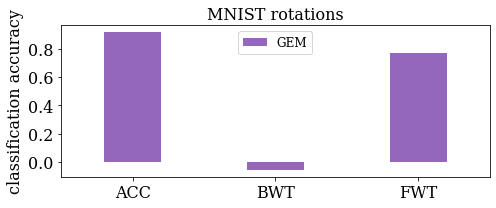

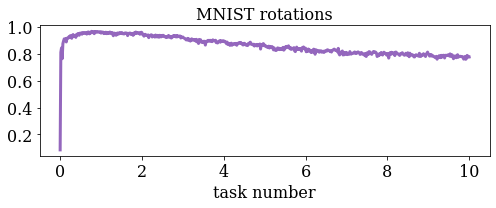

In [29]:
import matplotlib as mpl
mpl.use('Agg')
mpl.rcParams["font.family"] = "Times New Roman"
mpl.rcParams["font.family"] = "DejaVu Serif"

from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import torch

models = ['gem']
datasets = ['mnist_rotations']

names_datasets = {'mnist_rotations': 'MNIST rotations'}

names_models = {'gem': 'GEM'}

colors = {'gem': 'C4'}

barplot = {}

for dataset in datasets:
    barplot[dataset] = {}
    for model in models:
        barplot[dataset][model] = {}
        matches = glob(model + '*' + dataset + '*.pt')
        if len(matches):
            data = torch.load(matches[0], map_location=lambda storage, loc: storage)
            acc, bwt, fwt = data[3][:]
            barplot[dataset][model]['acc'] = acc
            barplot[dataset][model]['bwt'] = bwt
            barplot[dataset][model]['fwt'] = fwt

for dataset in datasets:
    x_lab = []
    y_acc = []
    y_bwt = []
    y_fwt = []

    for i, model in enumerate(models):
        if barplot[dataset][model] != {}:
            x_lab.append(model)
            y_acc.append(barplot[dataset][model]['acc'])
            y_bwt.append(barplot[dataset][model]['bwt'])
            y_fwt.append(barplot[dataset][model]['fwt'])

    x_ind = np.arange(len(y_acc))

    plt.figure(figsize=(7, 3))
    all_colors = []
    for xi, yi, li in zip(x_ind, y_acc, x_lab):
        plt.bar(xi, yi, label=names_models[li], color=colors[li])
        all_colors.append(colors[li])
    plt.bar(x_ind + (len(y_acc) + 1) * 1, y_bwt, color=all_colors)
    plt.bar(x_ind + (len(y_acc) + 1) * 2, y_fwt, color=all_colors)
    plt.xticks([0.01, 2, 4], ['ACC', 'BWT', 'FWT'], fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(-1, len(y_acc) * 3 + 2)
    plt.ylabel('classification accuracy', fontsize=16)
    plt.title(names_datasets[dataset], fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig('barplot_%s.pdf' % dataset, bbox_inches='tight')
    plt.show()

evoplot = {}

for dataset in datasets:
    evoplot[dataset] = {}
    for model in models:
        matches = glob(model + '*' + dataset + '*.pt')
        if len(matches):
            data = torch.load(matches[0], map_location=lambda storage, loc: storage)
            evoplot[dataset][model] = data[1][:, 0].numpy()

for dataset in datasets:

    plt.figure(figsize=(7, 3))
    for model in models:
        if model in evoplot[dataset]:
            x = np.arange(len(evoplot[dataset][model]))
            x = (x - x.min()) / (x.max() - x.min()) * 10
            plt.plot(x, evoplot[dataset][model], color=colors[model], lw=3)
            plt.xticks(range(0, 11, 2))

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel('task number', fontsize=16)
    plt.title(names_datasets[dataset], fontsize=16)
    plt.tight_layout()
    plt.savefig('evoplot_%s.pdf' % dataset, bbox_inches='tight')
    plt.show()